In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
private = read_csv("http://cssbook.net/d/private_capital.csv")
private = private %>% pivot_longer(cols = -Year, names_to="country", values_to="capital")
head(private)

Parsed with column specification:
cols(
  Year = col_double(),
  U.S. = col_double(),
  Japan = col_double(),
  Germany = col_double(),
  France = col_double(),
  U.K. = col_double(),
  Italy = col_double(),
  Canada = col_double(),
  Australia = col_double(),
  Spain = col_double()
)



Year,country,capital
<dbl>,<chr>,<dbl>
1970,U.S.,3.42
1970,Japan,2.99
1970,Germany,2.25
1970,France,3.10
1970,U.K.,3.06
1970,Italy,2.39


Parsed with column specification:
cols(
  Year = col_double(),
  U.S. = col_double(),
  Japan = col_double(),
  Germany = col_double(),
  France = col_double(),
  U.K. = col_double(),
  Italy = col_double(),
  Canada = col_double(),
  Australia = col_double(),
  Spain = col_double()
)



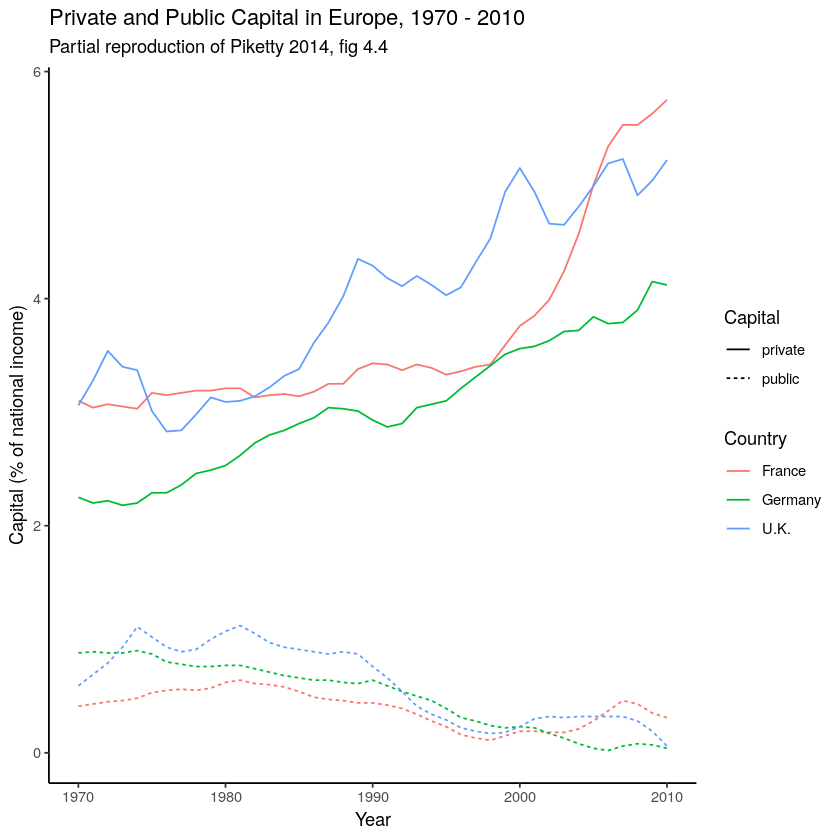

In [5]:
public = read_csv("http://cssbook.net/d/public_capital.csv") %>% 
  pivot_longer(cols = -Year, names_to="country", values_to="capital")

merged = bind_rows(private %>% add_column(type="private"),
                   public %>% add_column(type="public"))
merged %>% filter(country %in% c("Germany", "France", "U.K.")) %>% 
  ggplot(aes(x=Year, y=capital, color=country, lty=type)) + 
  geom_line()+ 
  ylab("Capital (% of national income)") +
  guides(colour=guide_legend("Country"), linetype=guide_legend("Capital")) + 
  theme_classic() + 
  ggtitle("Private and Public Capital in Europe, 1970 - 2010", 
          subtitle = "Partial reproduction of Piketty 2014, fig 4.4")
  